Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
ventas = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-warning">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
Has realizado un buen trabajo en la preparación de datos. Sin embargo, es importante mencionar la importación duplicada de la biblioteca seaborn </div>

 Profe entiendo que los dos hacen lo mismo. "import seaborn an ans" and "import seaborn as sns" Eliminare el ans ya que las graficas las estoy haciendo con sns.

# Paso 2. Prepara los datos

In [2]:
display(ventas)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [3]:

new_col_names = []

for old_name in ventas.columns:
    
    name_stripped = old_name.strip()
    
    name_lowered = name_stripped.lower()
   
    name_no_spaces = name_lowered.replace(' ', '_')
    
    new_col_names.append(name_no_spaces)
    
ventas.columns = new_col_names    

In [4]:
print(ventas.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
print(ventas.duplicated().sum()) 


0


In [6]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Convierte los datos en los tipos necesarios

In [7]:
ventas.sample(20) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1256,Tokyo Xtreme Racer Zero,PS2,2000.0,Racing,0.66,0.52,0.15,0.17,76.0,8.9,E
2469,Harry Potter and the Order of the Phoenix,DS,2007.0,Action,0.28,0.46,0.00,0.10,51.0,4.9,E
2689,Sonic & SEGA All-Stars Racing with Banjo-Kazooie,X360,2010.0,Racing,0.37,0.32,0.00,0.07,NaN,NaN,NaN
7923,Kuma-Tomo,3DS,2013.0,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NaN
5860,The King of Fighters XIII,PS3,2011.0,Fighting,0.17,0.06,0.04,0.03,77.0,8.2,T
2412,Wizards of Waverly Place,DS,2009.0,Misc,0.59,0.20,0.00,0.08,58.0,tbd,E
4411,Gundam SEED: Federation vs. Z.A.F.T.,PS2,2005.0,Shooter,0.00,0.00,0.44,0.00,NaN,NaN,NaN
7775,Enchanted Arms,X360,2006.0,Role-Playing,0.16,0.02,0.00,0.02,69.0,6.9,T
12555,Star Soldier: Vanishing Earth,N64,1998.0,Shooter,0.05,0.01,0.00,0.00,NaN,NaN,NaN
13160,Nounai Aeshe: IQ Suppli DS 2 - Sukkiri King Ke...,DS,2007.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN


Realizamos la creacion de dataframe con Nombre Ventas el cual contiene 16.715 filaS Y 11 columnas. podemos observar que en las columnas critic_score, user_score , rating   es donde mas datos Nan se tienen. estos datos no los vamos a remplazar ya que al ser valores de criticas y opinones de clientes. por tal razon no los vamos a modificar para no alterar la investigacion.

En la columna "user_score" hay un dato que no es numerico el cual tiene un nombre "tbd" este nombre lo vamos a remplazar por NaN.

In [8]:
ventas["user_score"] = ventas["user_score"].replace(["tbd"], [np.nan])


In [9]:
ventas["user_score"] = ventas["user_score"].astype("object").astype("float")

In [10]:
print(ventas['user_score'].unique()) 

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


Para la columna 'year_of_release' la cual corresponde a los años de lanzamiento del juego, encontramos unos datos con Nan. estos datos los vamos a borrar para que no interfieran en los agrupamientos que vamos a realizar mas adelante.

In [11]:
print(ventas['year_of_release'].unique()) 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [12]:
ventas = ventas.dropna(subset=["year_of_release"])


In [13]:
print(ventas['year_of_release'].unique()) 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]


La columna "year_of_release" estaba como tipo de datos Float ejemplo estaba como 2006.0 la convertiremos Int para que el año salga tipo entero 2006 y asi sea mas clara la informacion

In [14]:
ventas["year_of_release"] = ventas["year_of_release"].astype("float").astype("int")

In [15]:
ventas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [16]:
ventas["allsales"] = ventas["na_sales"] + ventas["eu_sales"] + ventas["jp_sales"] + ventas["other_sales"]

In [17]:
ventas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
ventastotales=ventas.groupby(["name"])["allsales"].sum().reset_index()


In [19]:
print(ventastotales.sort_values(by=["allsales"],ascending=[False]))

                                   name  allsales
10948                        Wii Sports     82.54
3694                 Grand Theft Auto V     56.58
9288                  Super Mario Bros.     45.31
9671                             Tetris     35.84
5546                     Mario Kart Wii     35.52
...                                 ...       ...
4266   Imagine Figure Skater (JP sales)      0.01
8113                    SD Gundam Force      0.01
10590              Unending Bloody Call      0.01
8104          S.Y.K: Shinsetsu Saiyuuki      0.01
3391                   G1 Jockey 4 2008      0.00

[11426 rows x 2 columns]


Anexamos una nueva columna con nombre "allsales" al dataframe Ventas. la cual es la suma de las regiones NA + EU + JP + Other Sales. con esta columna realizamos un agrupamiento para mostrar cuales fueron los video juegos que mas ventas tuvieron. el primer lugar es para Wii sport con 82.54 Millones de dolares  seguido de  Grand Theft Auto V con 56.58 Millones de dolares

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
¡Buen trabajo en la preparación de los datos! Has mostrado atención al detalle al convertir los nombres de las columnas a minúsculas. Además, has manejado bien los valores ausentes y los tipos de datos, Sin embargo, te sugiero tener cuidado con las importaciones duplicadas y la eficiencia en la escritura del código. ¡Sigue así!
</div>


# Paso 3. Analiza los datos

**Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [20]:
Juegosxaño=ventas.groupby(["year_of_release"])["name"].count().sort_values(ascending=[False])
display(Juegosxaño)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

podemos observar que en el año 2008 fue donde mas video juegos se lanzaron con 1.427 juegos , para el año 2016 solo se lanzaron 502 juegos, es decir solo 1/3 . lo cual nos indica que los creadores de videojuegos han incursionado en otros tipos de video juegos puede ser para Telefonos moviles. ya no se estan producciendo tantos videos juegos para consolas como se hacian 8 años atras.

**Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [21]:
salesforplatform=ventas.groupby(["platform"])["allsales"].sum()
display(salesforplatform.sort_values(ascending=[False]))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: allsales, dtype: float64

In [22]:
salesforbetherplatform=ventas.groupby(["platform","year_of_release"])["allsales"].sum()
salesforbetherplatform.sort_values(ascending=[False])

platform  year_of_release
PS2       2004               211.81
Wii       2009               206.97
PS2       2002               205.38
          2003               184.31
Wii       2008               171.32
                              ...  
PCFX      1996                 0.03
PC        1988                 0.03
3DO       1994                 0.02
DS        1985                 0.02
DC        2007                 0.02
Name: allsales, Length: 238, dtype: float64

**Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [23]:

filtered_ventas=ventas[(ventas['year_of_release'] <= 2016) & (ventas['year_of_release'] >= 2012)]
filtered_ventas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


decidi tomar el periodo de 2012 a 2016 ya que son los ultimos años en los cuales podemos realizar investigacion de mercado, ya que como obser vamos para los años 2007, 2008 ,2009 y 2010 fue donde mas bum hubo en el lanzamiento de video juegos. debemos trabajar con los ultimos años ya que se muestra que en estos ultimos años no se han lanzado tantos video juegos como en periodos pasados. por tal razon me centrare en este periodo.

por otro lado las mayores ventas se ven en plataformas como : PS2  con $ 1233.56 Md & X360 con 961.24 Md. estas plataformas son de consolas que se vendian en el año 2008 y 2009 las cuales ya son algo obsoletas. por ende ya no se estan haciendo video juegos para estas plataformas.

**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [24]:
salesforplatform=filtered_ventas.groupby(["year_of_release","platform"])["allsales"].sum()
salesforplatform

year_of_release  platform
2012             3DS          51.36
                 DS           11.01
                 PC           23.22
                 PS3         107.36
                 PSP           7.69
                 PSV          16.19
                 Wii          21.71
                 WiiU         17.56
                 X360         99.74
2013             3DS          56.57
                 DS            1.54
                 PC           12.38
                 PS3         113.25
                 PS4          25.99
                 PSP           3.14
                 PSV          10.59
                 Wii           8.59
                 WiiU         21.65
                 X360         88.58
                 XOne         18.96
2014             3DS          43.76
                 PC           13.28
                 PS3          47.76
                 PS4         100.00
                 PSP           0.24
                 PSV          11.90
                 Wii           3.75
  

Para el Año 2016 la plataforma lider en ventas fue PS4 Con ventas de $69.25 Md a nivel mundial. pero observamos que el año 2016 fue muy malo para las ventas de video juegos en general ya que para el periodo 2015 las ventas en la plataforma ps4 eran de  $118.90 Md. es decir sus ventas para esta plataforma se redujieron casi al 45%. 

lo mismo sucedio con  XOne. la cual es la segunda plataforma con mas ventas. se redujo de $60.14 Md para 2015 a $26.15 Md.

lo que indica que efectivamente si queremos lanzar un video juego. seria en alguna de estas dos plataformas. pero teniendo en cuenta que las ventas de video juegos han estado bajando, una posible causa es que ahora hay mas usuarios de celulares, los cuales pueden jugar en su celular sin realizar una compra adicional de alguna consola.

**Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos

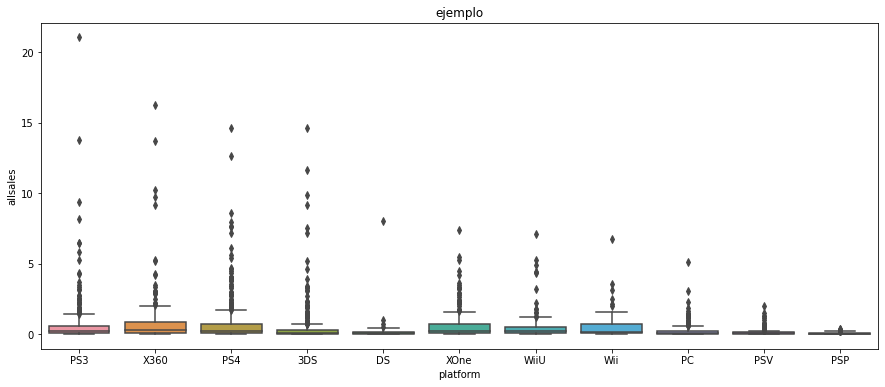

In [25]:
Variable_numerica= "allsales"
titulo= "grafico"

plt.figure(figsize=(15,6))
sns.boxplot(data=filtered_ventas,y= "allsales", x="platform")
plt.title("ejemplo")
plt.show()

podemos observar que para el periodo entre los años 2012 y 2016 que mas las mayores ventas para Xbox fueron en el Xbox360 y para el play fueron en el PS4. tambien hubo una buena acogida para wii. la primera generacion de esta plataforma fue de muy buen  exito.
son significativas las ventas se predomina la superioridad de dos plataformas que son las Ps y las Xbox. 

**Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la <b>correlación<b> entre las reseñas y las ventas. Saca conclusiones.


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
En esta sección es necesario cálcular la correlación con una matriz de correlación, si bien el texto menciona solo entre reseñas y ventas. Es mejor que incluyas todas las variables para mátriz, recuerda que corr() es válido usando solo las variables numericas del dataset</div>

In [26]:
ventas_corr=filtered_ventas.corr(method="spearman")
ventas_corr

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,allsales
year_of_release,1.000000,-0.111186,-0.073917,-0.095989,-0.118297,-0.003028,-0.006689,-0.179727
na_sales,-0.111186,1.000000,0.783681,-0.160581,0.918058,0.369145,-0.020790,0.822647
eu_sales,-0.073917,0.783681,1.000000,-0.222216,0.876659,0.411072,-0.027941,0.773721
jp_sales,-0.095989,-0.160581,-0.222216,1.000000,-0.113924,0.123861,0.304973,0.164409
other_sales,-0.118297,0.918058,0.876659,-0.113924,1.000000,0.404426,-0.004128,0.872260
critic_score,-0.003028,0.369145,0.411072,0.123861,0.404426,1.000000,0.446580,0.429956
user_score,-0.006689,-0.020790,-0.027941,0.304973,-0.004128,0.446580,1.000000,0.030530
allsales,-0.179727,0.822647,0.773721,0.164409,0.872260,0.429956,0.030530,1.000000


<AxesSubplot:>

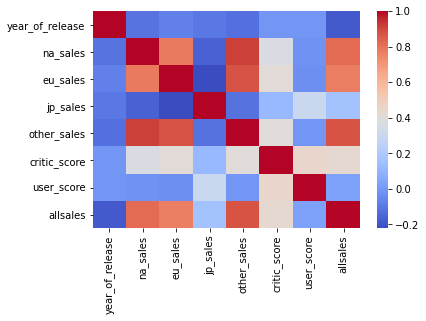

In [27]:
sns.heatmap(ventas_corr,
            xticklabels=ventas_corr.columns,
            yticklabels=ventas_corr.columns,
            cmap="coolwarm"
           )

 En el heatmap podemos ver con un color azul mas fuerte las  correlaciones negativas y rojo mas fuerte las correlaciones positivas.
 La correlación puede decir algo acerca de la relación entre las variables. Por ejemplo si queremos ver la correlación entre las reseñas ("critic_score")  y las ventas ("allsales") el valor es de 0.42 es decir no estan correlacionadas ya que estan por abajo de 0.5.
 
 un ejemplo donde la correlacion es mas alta es para las ventas   entre na_sales y other_sales ya que hay Una correlacion del 0.91 es decir casi iguales.

In [28]:
filtered_reseña=filtered_ventas[(filtered_ventas['platform'] >= "PS")]

In [29]:
resenaps4=filtered_reseña.groupby(["platform","year_of_release"])["critic_score"].mean()
ventasps4=filtered_reseña.groupby(["year_of_release"])["allsales"].sum()
PS4= pd.merge( resenaps4, ventasps4,right_index=True,left_index=True)
PS4

critic_score  allsales
platform year_of_release                        
PS3      2012                73.344086    270.25
         2013                71.741176    290.75
         2014                66.657143    274.49
         2015                63.000000    231.68
         2016                      NaN    109.55
PS4      2013                70.933333    290.75
         2014                73.134615    274.49
         2015                72.137931    231.68
         2016                71.673469    109.55
PSP      2012                      NaN    270.25
         2013                74.000000    290.75
         2014                      NaN    274.49
         2015                      NaN    231.68
PSV      2012                70.533333    270.25
         2013                70.173913    290.75
         2014                71.866667    274.49
         2015                71.642857    231.68
         2016                74.300000    109.55
Wii      2012                76.200000    270.25
         2013                      NaN    290.75
         2014                      NaN    274.49
         2015                      NaN    231.68
         2016                      NaN    109.55
WiiU     2012                67.550000    270.25
         2013                72.370370    290.75
         2014                70.733333    274.49
         2015                70.842105    231.68
         2016                72.666667    109.55
X360     2012                72.344444    270.25
         2013                71.836364    290.75
         2014                63.730769    274.49
         2015                      NaN    231.68
         2016                      NaN    109.55
XOne     2013                68.142857    290.75
         2014                74.279070    274.49
         2015                73.346154    231.68
         2016                73.833333    109.55

pondre como referencia la plataforma PS3. podemos observar que la critica cuando estubo sobre 63 puntos es decir la mas baja fue donde menos ventas hubieron. y sus mayores ventas estubieron cuando la critica estubo en 71 puntos. pero 71 puntos no fue la critica mas alta. la critica mas alta fue sobre los 73 puntos. lo cual indica que las reseñas no afectan en las ventas.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


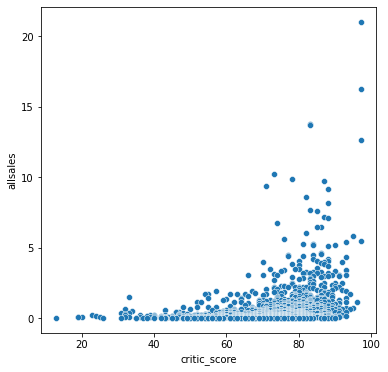

In [30]:
y=filtered_ventas["allsales"]
x=filtered_ventas["critic_score"]
fig= plt.figure(figsize=(6,6))
sns.scatterplot(x,y)
plt.show()

en el grafico de dispercion podemos observar como se acumulan las ventas la mayoria por debajo de los $5 Md. y como la mayoria de video juegos tienen una critica por encima de 65 a 90 puntos. muy pocos video juegos tienen ventas superiores a los $ 10 Md para concluir que la critica influye en las ventas de video juegos.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [31]:
filtered_ventasGrand_Theft_Auto_V=ventas[(ventas["name"] == "Grand Theft Auto V")]
filtered_ventasGrand_Theft_Auto_V

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


escogimos un juego popular el cual es Grand Theft Auto v para los años 2013 ,2014 y 2015. podemos observar que se tubo mayor exito para la consola o plataforma PS por ejemplo para el añp 2014 la consoila ps duplico en ventas a la consola de Xbox.

**Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [32]:
salesforgenre=filtered_ventas.groupby(["genre"])["allsales"].sum().sort_values(ascending=[False])
display(salesforgenre)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: allsales, dtype: float64

El genero de accion es donde mas ventas se han tenido entre los años 2012 & 2016. a las personas les gusta mas los juegos donde se vea violencia o los juegos de armas. por ejemplo el numero dos es Shooter que tambien es de violencia . observamos que los juegos de estrategias o de aventura no son tan bien vistos por los clientes. por tal razon si se requiere hacer un lanzamiento de algun juego nuevo , se tendria que ir mas hacia el genero de accion o violencia el cual tendria mas vistas y un posible exito.

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
Tu análisis de datos es exhaustivo y bien presentado. Has logrado identificar tendencias significativas en los datos. Sin embargo, te animo a explorar más formas de visualizar tus datos para extraer aún más insights. ¡Excelente trabajo!
</div>

 # Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:
* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [33]:
filtered_NA=ventas[(ventas["na_sales"] >= 0.01)]
filtered_NA


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [34]:
filtered_EU=ventas[(ventas["eu_sales"] >= 0.01)]
filtered_EU

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01


In [35]:
filtered_JP=ventas[(ventas["jp_sales"] >= 0.01)]
filtered_JP

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,allsales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [36]:
ventasplatformNA=filtered_NA.groupby(["platform"])["allsales"].sum().sort_values(ascending=[False])
ventasplatformNA.head()

platform
PS2     1159.23
X360     957.43
PS3      901.31
Wii      870.29
DS       734.82
Name: allsales, dtype: float64

In [37]:
ventasplatformEU=filtered_EU.groupby(["platform"])["allsales"].sum().sort_values(ascending=[False])
ventasplatformEU.head()

platform
PS2     1138.06
X360     920.34
PS3      882.43
Wii      799.00
PS       665.16
Name: allsales, dtype: float64

In [38]:
ventasplatformJP=filtered_JP.groupby(["platform"])["allsales"].sum().sort_values(ascending=[False])
ventasplatformJP.head()

platform
PS3     692.65
PS2     627.14
X360    586.28
Wii     506.06
DS      480.64
Name: allsales, dtype: float64

se puede evidenciar que JP le tiene mas cariño a las plataformas de Play station. ya que el PS3 Y PS2 mantienen el 1 y 2 en ventas.  mientras que para NA Y EU el play 2 es donde mas ventas se tuvieron de video juegos , seguidos por el x360. 

* Los cinco géneros principales. Explica la diferencia.

In [39]:
ventasgenreNA=filtered_NA.groupby(["genre"])["allsales"].sum().sort_values(ascending=[False])
ventasgenreNA.head(5)

genre
Action          1651.21
Sports          1224.88
Shooter         1024.05
Platform         806.82
Role-Playing     798.21
Name: allsales, dtype: float64

In [40]:
ventasgenreEU=filtered_EU.groupby(["genre"])["allsales"].sum().sort_values(ascending=[False])
ventasgenreEU.head(5)

genre
Action          1609.45
Sports          1141.00
Shooter         1014.69
Platform         797.79
Role-Playing     755.22
Name: allsales, dtype: float64

In [41]:
ventasgenreJP=filtered_JP.groupby(["genre"])["allsales"].sum().sort_values(ascending=[False])
ventasgenreJP.head(5)

genre
Action          994.28
Role-Playing    791.30
Shooter         697.67
Sports          633.19
Platform        613.36
Name: allsales, dtype: float64

El genero principal para las 3 regiones es Accion. se puede identificar que en EU Y NA tienen la misma silimitud en gustos de genero. para Jp sus gustos son completamente diferentes. por ejemplo el genero de deportes es la cuarta posicion en el ranking para JP. Mientras que para EU Y NA Es la segunda posicion. 

**Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
E= Todos
M= Mayor de 17 años
T= Adolecentes
E10+= Mayores de 10 Años

In [42]:
ventasratingNA=filtered_NA.groupby(["rating"])["allsales"].sum().sort_values(ascending=[False])
ventasratingNA.head(5)

rating
E       2387.00
M       1448.79
T       1447.38
E10+     635.18
K-A        4.31
Name: allsales, dtype: float64

In [43]:
ventasratingEU=filtered_EU.groupby(["rating"])["allsales"].sum().sort_values(ascending=[False])
ventasratingEU.head(5)

rating
E       2217.16
M       1443.14
T       1397.87
E10+     594.44
K-A        4.32
Name: allsales, dtype: float64

In [44]:
ventasratingJP=filtered_JP.groupby(["rating"])["allsales"].sum().sort_values(ascending=[False])
ventasratingJP.head(5)

rating
E       1311.78
M       1084.00
T        773.19
E10+     214.48
K-A        1.91
Name: allsales, dtype: float64

las clasificaciones de ESRB  no afectan a las ventas regionales. se muestra que para las 3 regiones las ventas que mas predominan con las de videojuegos que son aptos para todo publico.

# Paso 5. Prueba las siguientes hipótesis:

**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Establece tu mismo el valor de umbral alfa.

— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué

In [45]:
df_XOne=ventas[(ventas["platform"] =="XOne")]
Promedio_XOne=df_XOne["user_score"].dropna()
Promedio_XOne.mean()

6.521428571428572

In [46]:
filtered_PC=ventas[(ventas["platform"] == "PC")]
Promedio_PC=filtered_PC["user_score"].dropna()
Promedio_PC.mean()

7.065960264900661

Para realizar las respectivas hipotesis decidi eliminar los NaN de las columnas "user_score" ya que se deben eliminar para que no interfieran al momento de realizar el st.ttest_ind. esto lo hicimos po medio del metodo .dropna()

In [47]:

alpha = 0.05
results = st.ttest_ind(Promedio_XOne , Promedio_PC ,equal_var=False
)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.5385802963771776e-06
Rechazamos la hipótesis nula


HNula : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

HAlternativa : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC No son las mismas

debemos rechazar la Hipotesis de que "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas" en este caso la Hipotesis Alternativa es la correcta ya que hay una diferencia de 4 puntos en las dos plataformas.

**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


Establece tu mismo el valor de umbral alfa.
— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué

In [48]:
df_accion=ventas[(ventas["genre"] =="Action")]
Promedio_accion=df_accion["user_score"].dropna()
Promedio_accion.mean()

7.058129175946549

In [49]:
df_sport=ventas[(ventas["genre"] =="Sports")]
Promedio_sport=df_sport["user_score"].dropna()
Promedio_sport.mean()


6.951433857539316

In [50]:
alpha = 0.05
results1 = st.ttest_ind(Promedio_accion , Promedio_sport,equal_var=False
)

print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("No podemos rechazar la hipótesis nula")
else:
    print("Rechazamos la hipótesis nula")

valor p: 0.07370217419278534
Rechazamos la hipótesis nula


HNula : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

HAlternativa : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes No son diferentes

Efectivamente No podems rechazar la Hipotesis Nula. ya que las calificaciones promedio para los generos Accion y deportes son diferentes. Hay una diferencia de 0.07 % en los calificaciones promedio lo cual indica que efectivamente son diferentes los dos generos.

las hipotesis las decharamos segun las afirmaciones que se nos indicaron en el ejercicio. la hipotesis Nula fue la puesta en el ejercicio y la Hipotesis Alternativa es la negacion a la afirmacion dada en el ejercicio.

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
Has realizado un buen trabajo en la prueba de hipótesis, aplicando correctamente los métodos estadísticos y formulando bien tus hipótesis nula y alternativa. Tu interpretación de los resultados es clara.


## Conclusiones 

sobre la investigacion realizada a lo largo de este proyecto podemos concluir:

* Para el lanzamiento de un nuevo video juego se debe tener presente que en los ultimos 4 años las ventas han disminuido a nivel mundial de video juegos para todas las plataformas.
* Si tomamos como base los ultimos 4 años ( 2012 - 2016) podemos observar que las ventas donde mayor se dieron fueron en las plataformas ps2 y xbox. pero como vamos a lanzar un nuevo juego deberiamos tomar en cuenta la plataforma Ps3 ya que es la que mas ventas produce para el ultimo año en Japon , donde es la plataforma que se acaba de lanzar al mercado.
* Este video juego debe ser de Accion o de deportes ya que son los que mas exito producen.
* Viendo los ultimos años se ve que las ventas han disminuido notablemente a comparacion de los años 2007 , 2008 y 2009 donde fue los años que mas video juegos se vendieron. probablemente las bajas ventas se debe a los nuevos celulares con sistemas operativos que permiten descagar video juegos y asi no tener que comprar una consola para poder jugar un video juego.

Muchas Gracias.


<div class="alert alert-block alert-warning">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>
Tus conclusiones son bien pensadas y reflejan una comprensión profunda del análisis realizado. Has resumido eficazmente los hallazgos clave y proporcionado insights valiosos sobre la industria de los videojuegos. Si bien has realizado un gran trabajo en tu proyecto,<b> hay algunos aspectos que podrían mejorarlo aún más</b>.<br>

- Notamos la ausencia del uso del método <code>corr()</code> para el análisis de correlación. Este método es fundamental para comprender las relaciones entre diferentes variables en tus datos.<br>
 
- Como sugerencia adicional, podrías considerar incluir el cálculo de varianza o desviación estándar en las ventas por perfil de grupo. Esto te permitiría visualizar mejor la dispersión de tus datos y entender la variabilidad en las ventas. Estos cálculos podrían revelar tendencias o patrones ocultos, ayudándote a sacar conclusiones más profundas y detalladas.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del Revisor:</b> <a class="tocSkip"></a>
- Tu enfoque metódico para manejar los datos, especialmente en la limpieza y preparación, es impresionante. 🧹📈
- La aplicación de métodos estadísticos en la prueba de hipótesis muestra tu comprensión profunda del tema. 👨‍🏫🔢
- Tus conclusiones son informativas y proporcionan insights claros sobre la industria de los videojuegos. 🎮📊

¡Gracias por tu dedicación y esfuerzo! Sigue así, ¡y hasta la próxima! 🚀🌟
</div>
